<a href="https://colab.research.google.com/github/Axel3246/HackMty_2021/blob/main/RetoHackMty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ENTRENAMIENTO DE PROGRAMA Y DIVISIÓN DE MUESTRA, INPC 1Q ENE-2000, 2Q DIC-2020**

In [ ]:
import pandas as pd # Librería pandas

In [ ]:
datos_INPC = pd.read_excel('ca56_2018.xlsx') # indicamos el nombre de nuestro archivo a ser leído

In [ ]:
datos_INPC.head() #Se pone el encabezado para ver cuáles fueron los atributos cargados.

,Fecha,INPC,Subyacente,"Alimentos, bebidas y tabaco",Mercancías no Alimenticias,Vivienda,Educación,Otros Servicios,No subyacente,Frutas y Verduras,Pecuarios,Energéticos,Tarifas autorizadas por el gobierno,Control
0,1Q Ene 2000,44.809270,48.801160,37.727428,57.714886,54.657941,31.650998,49.893290,33.976642,36.467270,35.452439,29.242029,38.993265,0
1,2Q Ene 2000,45.052246,49.137179,38.012195,57.984337,55.004133,32.152531,50.294516,34.017754,35.396890,35.447264,29.207867,40.157381,0
2,1Q Feb 2000,45.272547,49.413209,38.232714,58.313512,55.306788,32.183850,50.614271,34.112554,34.626218,35.757818,29.572935,40.244958,0
3,2Q Feb 2000,45.386070,49.602727,38.400363,58.531245,55.477939,32.201694,50.852112,34.066644,33.992757,35.848459,29.592888,40.400738,0
4,1Q Mar 2000,45.530449,49.756948,38.531625,58.755930,55.619771,32.204424,50.996362,34.181999,33.443734,36.000967,30.001675,40.537508,0


In [ ]:
datos_INPC.describe()

,INPC,Subyacente,"Alimentos, bebidas y tabaco",Mercancías no Alimenticias,Vivienda,Educación,Otros Servicios,No subyacente,Frutas y Verduras,Pecuarios,Energéticos,Tarifas autorizadas por el gobierno,Control
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.0
mean,74.333429,77.102009,69.635281,79.026885,82.142129,71.794473,79.183082,66.600607,67.759005,67.666760,63.067370,71.606906,0.0
std,18.190912,16.719857,22.014132,14.223554,13.948230,22.018518,15.198163,22.321906,22.835087,23.925665,22.687465,20.205358,0.0
min,44.809270,48.801160,37.727428,57.714886,54.657941,31.650998,49.893290,33.976642,33.443734,35.447264,29.207867,38.993265,0.0
25%,58.788750,62.458250,49.420316,65.753360,70.742695,53.833127,67.017490,48.256086,48.508320,47.597356,44.944242,55.032428,0.0
50%,73.183555,77.074827,67.478447,78.019631,83.692457,70.660986,80.376643,62.983833,64.572016,61.917883,57.846640,72.682536,0.0
75%,87.883324,89.869486,86.477497,89.258772,93.142550,90.541811,90.299765,83.300342,81.052306,91.419016,78.530254,87.629674,0.0
max,109.374000,109.278530,113.696258,108.323295,105.970395,110.741478,107.873575,110.572379,124.616381,114.647701,110.850572,109.499419,0.0


In [ ]:
datos_seleccionados = datos_INPC.iloc[:,1:15] # : selecciona todas las filas y 3:8(-1) seleccion columnas de la 4 la 7

datos_seleccionados # desplegamos el dataframe

,INPC,Subyacente,"Alimentos, bebidas y tabaco",Mercancías no Alimenticias,Vivienda,Educación,Otros Servicios,No subyacente,Frutas y Verduras,Pecuarios,Energéticos,Tarifas autorizadas por el gobierno,Control
0,44.809270,48.801160,37.727428,57.714886,54.657941,31.650998,49.893290,33.976642,36.467270,35.452439,29.242029,38.993265,0
1,45.052246,49.137179,38.012195,57.984337,55.004133,32.152531,50.294516,34.017754,35.396890,35.447264,29.207867,40.157381,0
2,45.272547,49.413209,38.232714,58.313512,55.306788,32.183850,50.614271,34.112554,34.626218,35.757818,29.572935,40.244958,0
3,45.386070,49.602727,38.400363,58.531245,55.477939,32.201694,50.852112,34.066644,33.992757,35.848459,29.592888,40.400738,0
4,45.530449,49.756948,38.531625,58.755930,55.619771,32.204424,50.996362,34.181999,33.443734,36.000967,30.001675,40.537508,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,108.862000,108.771418,113.056909,107.932728,105.678454,110.691993,107.090936,109.143718,122.080105,109.830041,102.681476,109.445313,0
500,108.910000,108.655288,113.128905,107.188890,105.741024,110.691993,107.268432,109.696268,118.070287,111.124905,105.131984,109.480673,0
501,108.801000,108.628374,113.287737,106.808693,105.833298,110.691993,107.304940,109.335673,115.780811,112.258404,104.683119,109.422551,0
502,109.168000,109.194891,113.545082,108.285463,105.908217,110.691993,107.780872,109.083505,111.098902,113.831165,105.330919,109.411772,0


In [ ]:
datos_seleccionados.info()

datos_seleccionados.isnull().values.any() # buscamos valores nulos y obtenemos True o False dependiendo si hay o no

dataset = datos_seleccionados.dropna() # creamos un nuevo dataframe descartando los valores nulos o vacíos de nuestro dataframe datos_seleccionados

dataset.isnull().sum() # validamos que no tenemos valores nulos en ninguna columna, todos deben dar cero

dataset.columns # vemos los nombres de nuestras columnas para asignarlos a las variables

X = dataset[['Alimentos, bebidas y tabaco', 'Mercancías no Alimenticias', 'Vivienda', 'Educación', 'Otros Servicios', 'Frutas y Verduras', 'Pecuarios', 'Energéticos','Tarifas autorizadas por el gobierno']].values # variables independientes

y = dataset['INPC'].values ## variable dependiente



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   INPC                                 504 non-null    float64
 1   Subyacente                           504 non-null    float64
 2   Alimentos, bebidas y tabaco          504 non-null    float64
 3   Mercancías no Alimenticias           504 non-null    float64
 4   Vivienda                             504 non-null    float64
 5   Educación                            504 non-null    float64
 6   Otros Servicios                      504 non-null    float64
 7   No subyacente                        504 non-null    float64
 8   Frutas y Verduras                    504 non-null    float64
 9   Pecuarios                            504 non-null    float64
 10  Energéticos                          504 non-null    float64
 11  Tarifas autorizadas por el gobie

In [ ]:
from sklearn.model_selection import train_test_split # importamos la herramienta para dividir los datos de SciKit-Learn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # asignación de los datos 80% para entrenamiento y 20% para prueba

from sklearn.linear_model import LinearRegression # importamos la clase de regresión lineal

modelo_regresion = LinearRegression() # modelo de regresión

modelo_regresion.fit(X_train, y_train) # aprendizaje automático con base en nuestros datos

x_columns = ['Alimentos, bebidas y tabaco', 'Mercancías no Alimenticias', 'Vivienda', 'Educación', 'Otros Servicios', 'Frutas y Verduras', 'Pecuarios', 'Energéticos','Tarifas autorizadas por el gobierno']
coeff_df = pd.DataFrame(modelo_regresion.coef_, x_columns, columns=['Coeficientes'])
coeff_df # despliega los coefientes y sus valores; por cada unidad del coeficente, su impacto en las calorías será igual a su valor


,Coeficientes
"Alimentos, bebidas y tabaco",0.214784
Mercancías no Alimenticias,0.145089
Vivienda,0.197848
Educación,0.047456
Otros Servicios,0.133276
Frutas y Verduras,0.040857
Pecuarios,0.050407
Energéticos,0.103877
Tarifas autorizadas por el gobierno,0.059408


In [ ]:
y_pred = modelo_regresion.predict(X_test) # probamos nuestro modelo con los valores de prueba

validacion = pd.DataFrame({'Actual': y_test, 'Predicción': y_pred, 'Diferencia': y_test-y_pred }) # creamos un dataframe con los valores actuales y los de predicción

muestra_validacion = validacion.head(100) # elegimos una muestra con 100 valores 

muestra_validacion # desplegamos esos 100 valores 

,Actual,Predicción,Diferencia
0,54.701944,54.723555,-0.021612
1,55.863423,55.860332,0.003091
2,105.299000,105.339403,-0.040403
3,84.943506,84.962522,-0.019016
4,89.327784,89.362333,-0.034549
...,...,...,...
95,94.852455,94.822614,0.029841
96,51.483587,51.578522,-0.094936
97,99.818949,99.819141,-0.000192
98,51.872845,51.942207,-0.069362


In [ ]:
validacion["Diferencia"].describe()



count    101.000000
mean      -0.002725
std        0.037445
min       -0.094936
25%       -0.028335
50%       -0.001640
75%        0.025176
max        0.078848
Name: Diferencia, dtype: float64

In [ ]:
from sklearn.metrics import r2_score # importamos la métrica R cuadrada (coeficiente de determinación)

r2_score(y_test, y_pred) # ingresamos nuestros valores reales y calculados para obterner la R2


0.9999836651941661

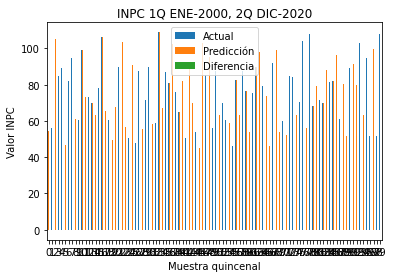

In [ ]:
import matplotlib.pyplot as plt # importamos la librería que nos permitirá graficar

muestra_validacion.plot.bar(rot=0)  # creamos un gráfico de barras con el dataframe que contiene nuestros datos actuales y de predicción

plt.title("INPC 1Q ENE-2000, 2Q DIC-2020") # indicamos el título del gráfico

plt.xlabel("Muestra quincenal") # indicamos la etiqueta del eje de las x

plt.ylabel("Valor INPC") # indicamos la etiqueta del eje de las y

plt.show() # desplegamos el gráfico

## **PRONÓSTICOS VARIACIÓN SUBYACENTE DENTRO DE LA MUESTRA**

In [ ]:
import pandas as pd # Librería pandas
datos_INPC3 = pd.read_excel('ca56_2018.xlsx') # indicamos el nombre de nuestro archivo a ser leído

datos_seleccionados3 = datos_INPC3.iloc[:,2:15]
datos_seleccionados3

,Subyacente,"Alimentos, bebidas y tabaco",Mercancías no Alimenticias,Vivienda,Educación,Otros Servicios,No subyacente,Frutas y Verduras,Pecuarios,Energéticos,Tarifas autorizadas por el gobierno,Control
0,48.801160,37.727428,57.714886,54.657941,31.650998,49.893290,33.976642,36.467270,35.452439,29.242029,38.993265,0
1,49.137179,38.012195,57.984337,55.004133,32.152531,50.294516,34.017754,35.396890,35.447264,29.207867,40.157381,0
2,49.413209,38.232714,58.313512,55.306788,32.183850,50.614271,34.112554,34.626218,35.757818,29.572935,40.244958,0
3,49.602727,38.400363,58.531245,55.477939,32.201694,50.852112,34.066644,33.992757,35.848459,29.592888,40.400738,0
4,49.756948,38.531625,58.755930,55.619771,32.204424,50.996362,34.181999,33.443734,36.000967,30.001675,40.537508,0
...,...,...,...,...,...,...,...,...,...,...,...,...
499,108.771418,113.056909,107.932728,105.678454,110.691993,107.090936,109.143718,122.080105,109.830041,102.681476,109.445313,0
500,108.655288,113.128905,107.188890,105.741024,110.691993,107.268432,109.696268,118.070287,111.124905,105.131984,109.480673,0
501,108.628374,113.287737,106.808693,105.833298,110.691993,107.304940,109.335673,115.780811,112.258404,104.683119,109.422551,0
502,109.194891,113.545082,108.285463,105.908217,110.691993,107.780872,109.083505,111.098902,113.831165,105.330919,109.411772,0


In [ ]:
datos_seleccionados3.info()

datos_seleccionados3.isnull().values.any() # buscamos valores nulos y obtenemos True o False dependiendo si hay o no

dataset3 = datos_seleccionados3.dropna() # creamos un nuevo dataframe descartando los valores nulos o vacíos de nuestro dataframe datos_seleccionados

dataset3.isnull().sum() # validamos que no tenemos valores nulos en ninguna columna, todos deben dar cero

dataset3.columns # vemos los nombres de nuestras columnas para asignarlos a las variables

X3 = dataset3[['Alimentos, bebidas y tabaco', 'Mercancías no Alimenticias', 'Vivienda', 'Educación', 'Otros Servicios','Control','Control','Control','Control']].values # variables independientes

y3 = dataset3['Subyacente'].values # variable dependiente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Subyacente                           504 non-null    float64
 1   Alimentos, bebidas y tabaco          504 non-null    float64
 2   Mercancías no Alimenticias           504 non-null    float64
 3   Vivienda                             504 non-null    float64
 4   Educación                            504 non-null    float64
 5   Otros Servicios                      504 non-null    float64
 6   No subyacente                        504 non-null    float64
 7   Frutas y Verduras                    504 non-null    float64
 8   Pecuarios                            504 non-null    float64
 9   Energéticos                          504 non-null    float64
 10  Tarifas autorizadas por el gobierno  504 non-null    float64
 11  Control                         

In [ ]:
from sklearn.model_selection import train_test_split # importamos la herramienta para dividir los datos de SciKit-Learn

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=0) # asignación de los datos 80% para entrenamiento y 20% para prueba

In [ ]:
y_pred3 = modelo_regresion.predict(X_test3)

validacion3 = pd.DataFrame({'Actual': y_test3, 'Predicción': y_pred3, 'Diferencia': y_test3-y_pred3 }) # creamos un dataframe con los valores actuales y los de predicción

muestra_validacion3 = validacion3.head(100) # elegimos una muestra con 100 valores 
muestra_validacion3 # desplegamos esos 100 valores 

,Actual,Predicción,Diferencia
0,59.055924,43.769014,15.286910
1,59.701246,44.278880,15.422366
2,104.798292,78.146390,26.651902
3,86.521993,64.494718,22.027275
4,91.808920,68.457137,23.351783
...,...,...,...
95,95.363688,71.086981,24.276708
96,56.097507,41.566225,14.531282
97,99.948584,74.515627,25.432957
98,56.246024,41.709364,14.536660


In [ ]:
validacion3["Diferencia"].describe()

count    101.000000
mean      19.908662
std        4.078793
min       12.733623
25%       16.472501
50%       19.913177
75%       23.033543
max       27.620178
Name: Diferencia, dtype: float64

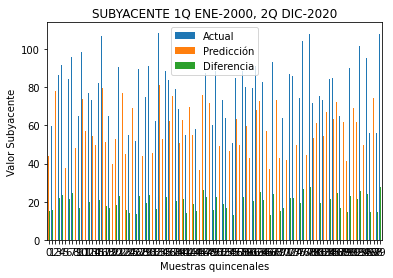

In [ ]:
import matplotlib.pyplot as plt # importamos la librería que nos permitirá graficar

muestra_validacion3.plot.bar(rot=0)  # creamos un gráfico de barras con el dataframe que contiene nuestros datos actuales y de predicción

plt.title("SUBYACENTE 1Q ENE-2000, 2Q DIC-2020") # indicamos el título del gráfico

plt.xlabel("Muestras quincenales") # indicamos la etiqueta del eje de las x

plt.ylabel("Valor Subyacente") # indicamos la etiqueta del eje de las y

plt.show() # desplegamos el gráfico

## **PREDICCIÓN INPC 1Q ENE-2021, 1Q AGO-2021**



In [ ]:
import pandas as pd # Librería pandas
datos_INPC2 = pd.read_excel('Pronósticos.xlsx') # indicamos el nombre de nuestro archivo a ser leído

datos_seleccionados2 = datos_INPC2.iloc[:,1:15] 

datos_seleccionados2 # desplegamos el dataframe

,INPC,Subyacente,"Alimentos, bebidas y tabaco",Mercancías no Alimenticias,Vivienda,Educación,Otros Servicios,No subyacente,Frutas y Verduras,Pecuarios,Energéticos,Tarifas autorizadas por el gobierno,Control
0,109.936,109.535926,114.232516,108.650728,106.082732,110.698795,107.911069,111.172485,110.541653,114.729594,109.956891,109.987671,0
1,110.484,109.721867,114.569421,108.828268,106.205984,110.442144,108.079535,112.839845,111.451547,115.107253,113.318615,110.213796,0
2,110.736,109.961759,114.802123,109.267737,106.303823,110.605161,108.249853,113.128258,108.776158,115.862334,114.767299,110.356667,0
3,111.079,110.160047,114.968962,109.567494,106.409347,110.621018,108.493714,113.919511,108.479137,116.930361,116.260003,110.311365,0
4,111.668,110.541054,115.391160,110.055510,106.546873,110.621487,109.006699,115.149814,109.015900,118.058425,118.331747,110.455105,0
5,111.981,110.766903,115.711885,110.134555,106.650811,110.621487,109.442359,115.734395,109.300906,119.083671,119.051086,110.463804,0
6,112.052,110.966931,116.000429,110.492297,106.742262,110.621947,109.503348,115.406095,112.835766,119.532371,116.295400,110.632142,0
7,112.328,111.154931,116.299092,110.498436,106.838933,110.621947,109.886272,115.953730,114.838891,120.815450,115.975206,110.672314,0
8,112.321,111.520667,116.818791,110.930817,106.964536,110.628061,110.289995,114.794212,116.833547,121.759735,111.656667,110.726559,0
9,112.517,111.767779,117.355495,110.972142,107.064569,110.619360,110.614440,114.833830,117.406030,121.385026,111.668284,110.807140,0


In [ ]:
datos_seleccionados2.info()

datos_seleccionados2.isnull().values.any() # buscamos valores nulos y obtenemos True o False dependiendo si hay o no

dataset2 = datos_seleccionados2.dropna() # creamos un nuevo dataframe descartando los valores nulos o vacíos de nuestro dataframe datos_seleccionados

dataset2.isnull().sum() # validamos que no tenemos valores nulos en ninguna columna, todos deben dar cero

dataset2.columns # vemos los nombres de nuestras columnas para asignarlos a las variables

X2 = dataset2[['Alimentos, bebidas y tabaco', 'Mercancías no Alimenticias', 'Vivienda', 'Educación', 'Otros Servicios', 'Frutas y Verduras', 'Pecuarios', 'Energéticos','Tarifas autorizadas por el gobierno']].values # variables independientes

y2 = dataset2['INPC'].values # variable dependiente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   INPC                                 15 non-null     float64
 1   Subyacente                           15 non-null     float64
 2   Alimentos, bebidas y tabaco          15 non-null     float64
 3   Mercancías no Alimenticias           15 non-null     float64
 4   Vivienda                             15 non-null     float64
 5   Educación                            15 non-null     float64
 6   Otros Servicios                      15 non-null     float64
 7   No subyacente                        15 non-null     float64
 8   Frutas y Verduras                    15 non-null     float64
 9   Pecuarios                            15 non-null     float64
 10  Energéticos                          15 non-null     float64
 11  Tarifas autorizadas por el gobiern

In [ ]:
y_pred2 = modelo_regresion.predict(X2)

validacion2 = pd.DataFrame({'Actual': y2, 'Predicción': y_pred2, 'Diferencia': y2-y_pred2 }) # creamos un dataframe con los valores actuales y los de predicción

muestra_validacion2 = validacion2.head(15) # elegimos una muestra con 15 valores 
muestra_validacion2 # desplegamos esos 15 valores

,Actual,Predicción,Diferencia
0,109.936,109.893619,0.042381
1,110.484,110.445251,0.038749
2,110.736,110.696511,0.039489
3,111.079,111.024035,0.054965
4,111.668,111.583662,0.084338
5,111.981,111.881208,0.099792
6,112.052,111.912121,0.139879
7,112.328,112.162964,0.165036
8,112.321,112.099987,0.221013
9,112.517,112.294374,0.222626


In [ ]:
validacion2["Diferencia"].describe()

count    15.000000
mean      0.165911
std       0.100308
min       0.038749
25%       0.069652
50%       0.165036
75%       0.256767
max       0.317840
Name: Diferencia, dtype: float64

In [ ]:
from sklearn.metrics import r2_score # importamos la métrica R cuadrada (coeficiente de determinación)

r2_score(y2, y_pred2) # ingresamos nuestros valores reales y calculados para obterner la R2


0.9726641825809438

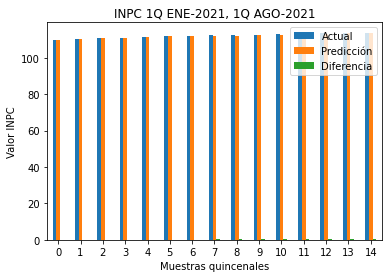

In [ ]:
import matplotlib.pyplot as plt # importamos la librería que nos permitirá graficar

muestra_validacion2.plot.bar(rot=0)  # creamos un gráfico de barras con el dataframe que contiene nuestros datos actuales y de predicción

plt.title("INPC 1Q ENE-2021, 1Q AGO-2021") # indicamos el título del gráfico

plt.xlabel("Muestras quincenales") # indicamos la etiqueta del eje de las x

plt.ylabel("Valor INPC") # indicamos la etiqueta del eje de las y

plt.show() # desplegamos el gráfico

## **PRONÓSTICOS INPC SUBYACENTE 1Q ENE-2021, 1Q AGO-2021**

In [ ]:
X4 = dataset2[['Alimentos, bebidas y tabaco', 'Mercancías no Alimenticias', 'Vivienda', 'Educación', 'Otros Servicios', 'Control', 'Control', 'Control','Control']].values # variables independientes

y4 = dataset2['Subyacente'].values # variable dependiente

In [ ]:
y_pred4 = modelo_regresion.predict(X4)

validacion4 = pd.DataFrame({'Actual': y4, 'Predicción': y_pred4, 'Diferencia': y4-y_pred4}) # creamos un dataframe con los valores actuales y los de predicción

muestra_validacion4 = validacion4.head(15) # elegimos una muestra con 15 valores 
muestra_validacion4 # desplegamos esos 15 valores 

,Actual,Predicción,Diferencia
0,109.535926,81.637823,27.898103
1,109.721867,81.770602,27.951266
2,109.961759,81.934137,28.027622
3,110.160047,82.067594,28.092452
4,110.541054,82.324682,28.216372
5,110.766903,82.483664,28.283239
6,110.966931,82.623787,28.343144
7,111.154931,82.758986,28.395945
8,111.520667,83.012290,28.508377
9,111.767779,83.196180,28.571598


In [ ]:
validacion4["Diferencia"].describe()

count    15.000000
mean     28.434351
std       0.358674
min      27.898103
25%      28.154412
50%      28.395945
75%      28.737207
max      28.984879
Name: Diferencia, dtype: float64

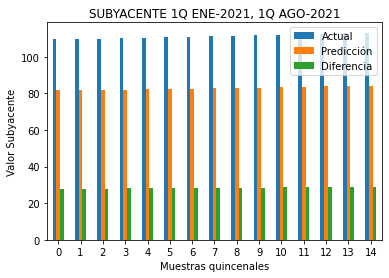

In [ ]:
import matplotlib.pyplot as plt # importamos la librería que nos permitirá graficar

muestra_validacion4.plot.bar(rot=0)  # creamos un gráfico de barras con el dataframe que contiene nuestros datos actuales y de predicción

plt.title("SUBYACENTE 1Q ENE-2021, 1Q AGO-2021") # indicamos el título del gráfico

plt.xlabel("Muestras quincenales") # indicamos la etiqueta del eje de las x,

plt.ylabel("Valor Subyacente") # indicamos la etiqueta del eje de las y

plt.show() # desplegamos el gráfico